# Pymaceuticals Inc.
---

### Analysis
With a correlation coefficient of 0.84, there is a strong positive correlation betwen weight and tumor volume.  
Of the four promising drug regimen Capomulin and Ramicane are the most effective drug treatment regiment. These drugs also had the lowest variablity in final tumor volume and the lowest final tumor volume.
Ramicane performed slightly better than Capomulin with a median final tumor volume of 40.6 mm3 vs 41.55, respectively.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
num_mice

249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids = combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_ids


array(['g989'], dtype=object)

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_data.loc[combined_data["Mouse ID"] == "g989",:]



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
clean_df = combined_data[combined_data["Mouse ID"].isin(duplicate_ids)==False]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = len(clean_df["Mouse ID"].unique())
num_mice_cleaned

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

stdv = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean': mean,
                          'Median': median,
                          'Variance': variance,
                          'Standard Dev.': stdv,
                          'SEM': SEM})


summary_df

,Mean,Median,Variance,Standard Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_df.groupby('Drug Regimen')
agg_stats = agg_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
agg_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

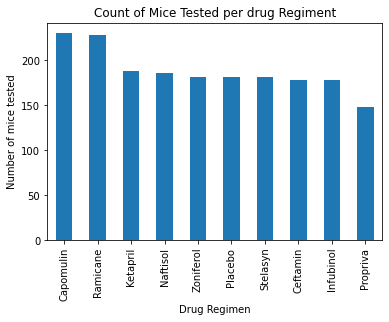

In [27]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
barplt = pd.value_counts(clean_df['Drug Regimen'])
barplt.plot(kind='bar')
plt.title("Count of Mice Tested per drug Regiment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.show()

In [28]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_group = clean_df.groupby('Drug Regimen')
count_regimen = regimen_group['Drug Regimen'].count()
count_regimen
count_regimen.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

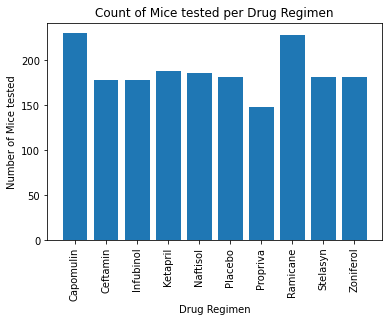

In [32]:
x_axis = count_regimen.index

#tick_locations = [value for value in x_axis]

plt.xticks(rotation="vertical")

plt.title("Count of Mice tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice tested")
plt.bar(x_axis, count_regimen)

plt.show()

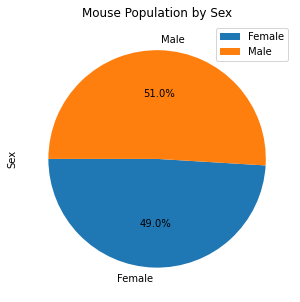

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
bygender = clean_df.groupby("Sex").count()
forpie = bygender["Mouse ID"].plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=180, legend='true')
plt.title('Mouse Population by Sex')
plt.ylabel('Sex')

plt.savefig('piechart2')
plt.show()

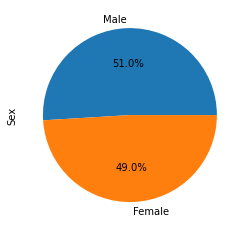

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = clean_df['Sex'].value_counts()
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
#plt.title('Mouse Population by Sex')
plt.ylabel('Sex')
plt.show()

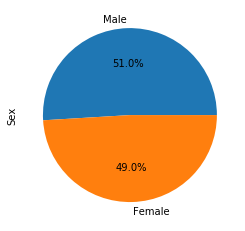

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [116]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_df[clean_df["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [117]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [120]:
# Put treatments into a list for for loop (and later for plot labels)   
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

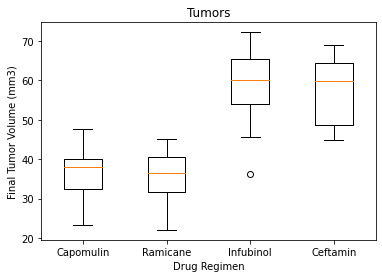

In [121]:
data_to_plot = tumorvol

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

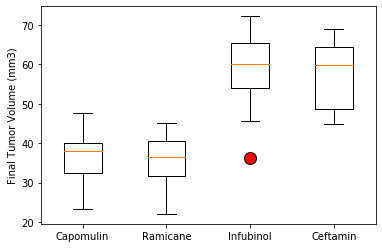

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

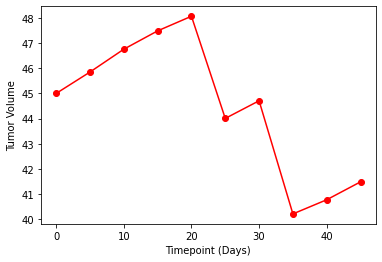

In [93]:
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_df

line_plt = cap_df.loc[cap_df['Mouse ID']== 'l509',:]
line_plt

time = line_plt['Timepoint']
tumor = line_plt['Tumor Volume (mm3)']


plt.plot(time,tumor, color = 'red', marker = 'o', label = ())
#plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume')


plt.savefig('linechart')
plt.show()


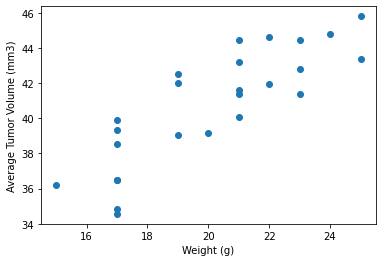

In [81]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#plt.title('Weight vs Avg Tumor Volume for Mice on Capomulin ')
plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [82]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capavg['Weight (g)']
tumor = capavg['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


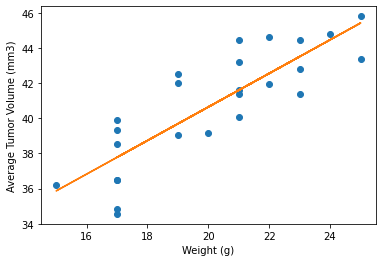

In [87]:
x = capavg['Weight (g)']
y = capavg['Tumor Volume (mm3)']
plt.plot(x,y,'o')
m,b = np.polyfit(x,y,1)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#plt.title('Weight vs Avg Tumor Volume for Mice on Capomulin ')
plt.plot(x,m*x+b)
plt.show()

In [85]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capavg['Weight (g)']
tumor = capavg['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The correlation between mouse weight and the average tumor volume is 0.84


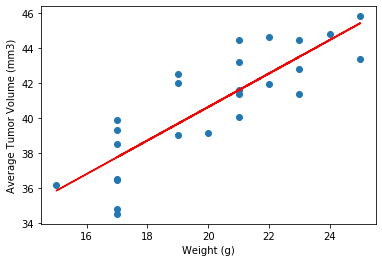

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen